# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [117]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = (data['income'] == '>50K').sum()

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = (data['income'] == '<=50K').sum()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / n_records * 100.0

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

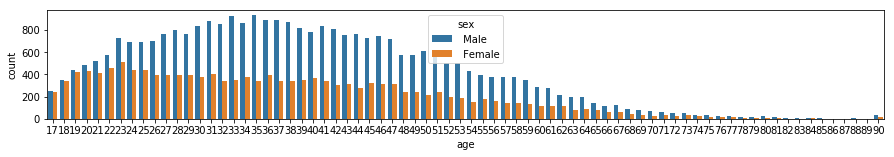

In [177]:
fig, ax = plt.subplots(figsize=(15,2))
sns.countplot(x='age', hue='sex', data=data, ax=ax)

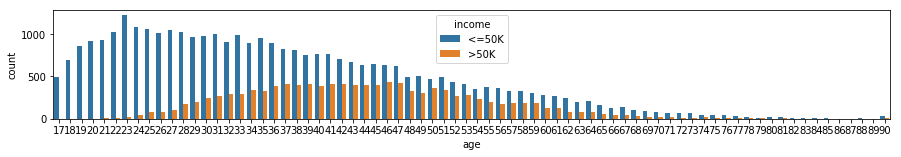

In [181]:
fig, ax = plt.subplots(figsize=(15,2))
sns.countplot(x='age', hue='income', data=data, ax=ax)

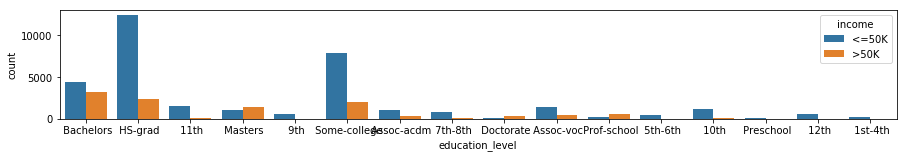

In [218]:
fig, ax = plt.subplots(figsize=(15,2))
sns.countplot(x='education_level', hue='income', data=data, ax=ax)

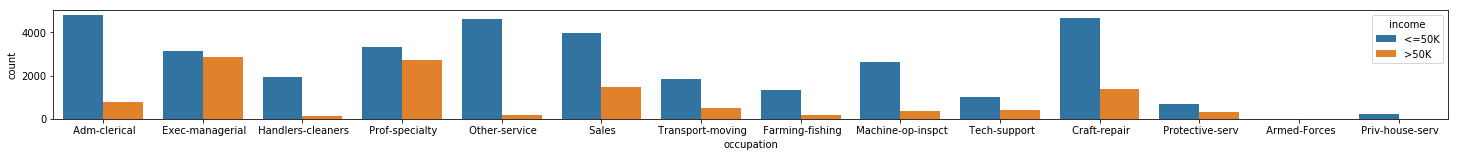

In [222]:
fig, ax = plt.subplots(figsize=(25,2))
sns.countplot(x='occupation', hue='income', data=data, ax=ax)

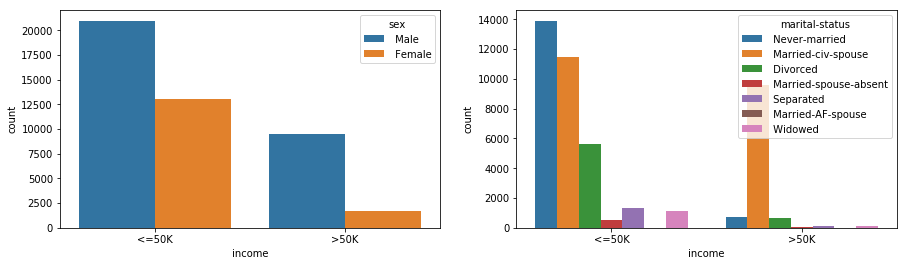

In [197]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(x='income', hue='sex', data=data, ax=ax[0])
sns.countplot(x='income', hue='marital-status', data=data, ax=ax[1])

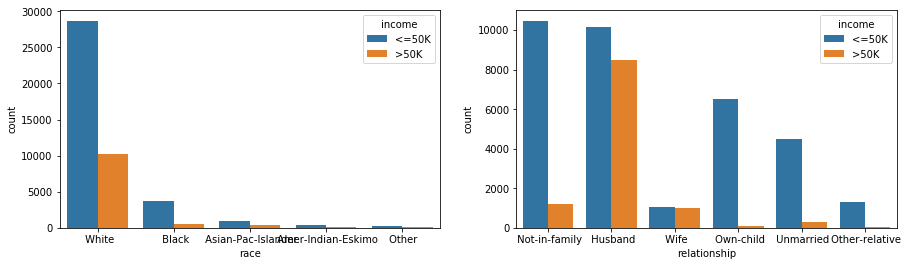

In [202]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(x='race', hue='income', data=data, ax=ax[0])
sns.countplot(x='relationship', hue='income', data=data, ax=ax[1])

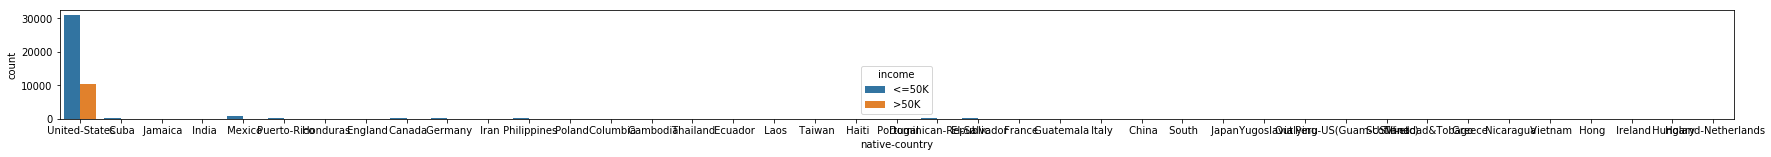

In [224]:
fig, ax = plt.subplots(figsize=(30,2))
sns.countplot(x='native-country', hue='income', data=data, ax=ax)

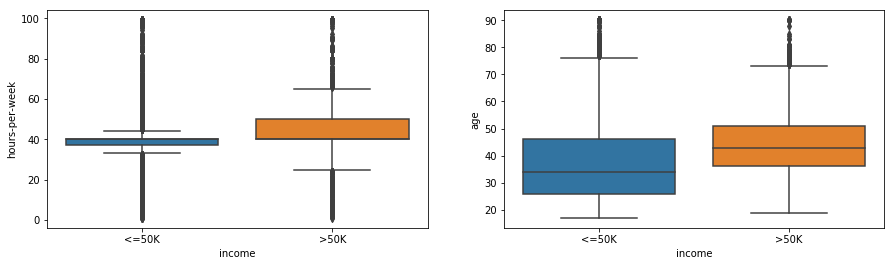

In [214]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(x='income', y='hours-per-week', data=data, ax=ax[0])
sns.boxplot(x='income', y='age', data=data, ax=ax[1])

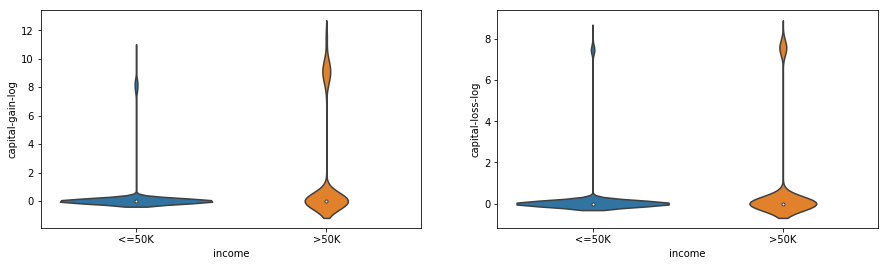

In [239]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
new_data = pd.DataFrame(data[['income', 'capital-gain', 'capital-loss']])
new_data['capital-gain-log'] = new_data['capital-gain'].apply(lambda x: np.log(x + 1))
new_data['capital-loss-log'] = new_data['capital-loss'].apply(lambda x: np.log(x + 1))
sns.violinplot(x='income', y='capital-gain-log', data=new_data, ax=ax[0])
sns.violinplot(x='income', y='capital-loss-log', data=new_data, ax=ax[1])

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

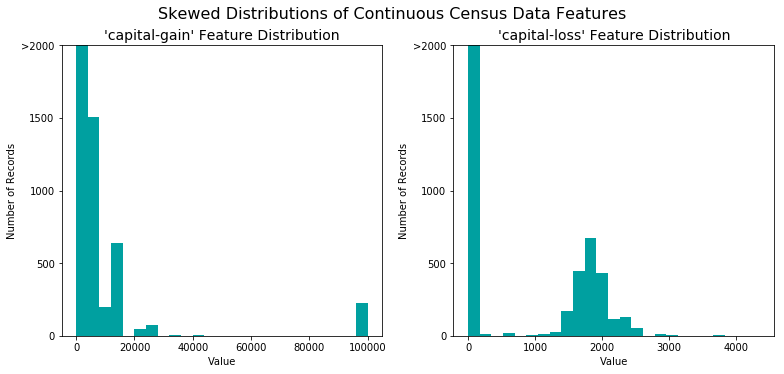

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

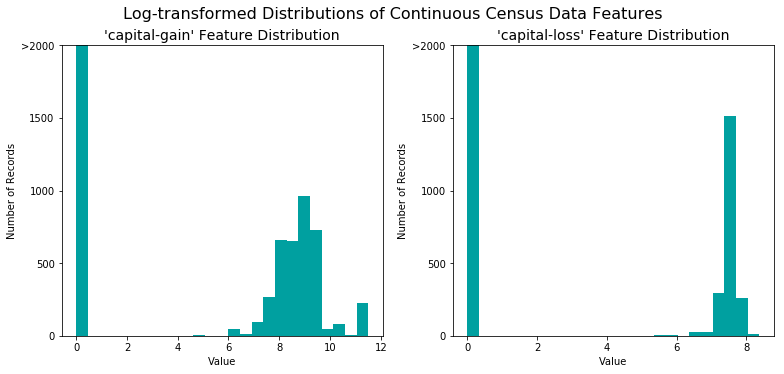

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
features_log_minmax_transform.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [8]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
categorical = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
features_final = pd.get_dummies(features_log_minmax_transform, columns=categorical)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x:  0 if x == '<=50K' else 1)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
encoded

103 total features after one-hot encoding.


['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_level_ 10th',
 'education_level_ 11th',
 'education_level_ 12th',
 'education_level_ 1st-4th',
 'education_level_ 5th-6th',
 'education_level_ 7th-8th',
 'education_level_ 9th',
 'education_level_ Assoc-acdm',
 'education_level_ Assoc-voc',
 'education_level_ Bachelors',
 'education_level_ Doctorate',
 'education_level_ HS-grad',
 'education_level_ Masters',
 'education_level_ Preschool',
 'education_level_ Prof-school',
 'education_level_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-cleri

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [14]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
                    # encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP / (TP + FP)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * precision * recall / ((beta**2 * precision)  + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

### Answer

#### Gaussian Naive Bayes

- Real World Application:
    - Usually applied to text classification problems such as spam classification, etc.
- Strengths
    - It is a simple model that relies on a bunch of counts and conditional probabilities, which makes it easy to implement. 
    - It performs quickly and with less data when the features being used for training are almost conditionally independent of each other. 
    - It is an eager-learning classifier that is capable of learning and evolving over time.
- Weaknesses
    - Since it makes the naive assumption that all features are conditionally independent of each other, it will not be able to detect interactions between features which could lead to inaccurate models. This implies it has a high bias.
    - There should be adequate representation of various combinations of features and labels in the training data. If the training set doesn't have almost the same distribution of data as the test set such that a particular combination of one or more features and a label is present only in the test set and not in the training set, this will lead to a probability of 0 for this particular combination leading to a posterior probability of 0. Other techniques such as Lagrange correction have to be used to rectify this problem.
    - Works out of the box with discrete features, but not with continuous features. Techniques such as binning or probability density functions have to be used to support continuous features.
    - Can be used only for classification and not regression tasks
- Is it a good candidate?
    - It may not be a good candidate for the current data since there might exist some conditional dependency between features - For eg., education_level is related to education-num since the education_level determines the number of years spent in education.
- Sources
    - https://www.quora.com/What-are-the-disadvantages-of-using-a-naive-bayes-for-classification
    - https://medium.com/data-science-analytics/naive-bayes-or-k-nn-for-classification-60a4d92e7bab

#### Decision Trees

- Real World Application:
    - Used in credit scoring and medical diagnosis
- Strengths
    - Can be easily visualized for humans to understand and interpret
    - The cost of predicting points with the tree is logarithmic in the number of data points used to train the tree.
    - Easily handles interactions between features during training
    - Doesn't require the data to be linearly separable. 
    - Nonlinear relationships between parameters do not affect tree performance.
    - Can be used for both classification and regression tasks
- Weaknesses
    - Prone to overfitting and may not generalize to the test data well. Techniques such as pruning, setting the minimum number of samples required in a leaf node and maximum depth of the tree have to be used to combat this problem. 
    - Doesn't support online learning, which implies that the tree has to be re-built from scratch whenever new training data is obtained.
    - There should be adequate representation of all label classes in the training set to prevent the creation of a biased tree.
    - Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
- Is it a good candidate?
    - May not be a good candidate for the current data since the data is skewed with only 24% of data corresponds to people whose income is greater than 50K, which could lead to biased trees.
- Sources
    - https://scikit-learn.org/stable/modules/tree.html#
    - https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

#### AdaBoost

- Real World Application:
    - Face detection
- Strengths
    - Can achieve comparable results to powerful classification algorithms like SVM, with fewer tweaks to parameters and settings (namely, choosing the weak classifier and the number of rounds of boosting during the training phase)
    - Less susceptible to overfitting than the Decision Tree classifier.
    - If the model fails at some point, you can have a sense of which weak learner was to blame, which allows manual tuning of  the models to improve performance.
    - Can be used for both classification and regression tasks, based on the weak classifier chosen
- Weaknesses
    - Can be sensitive to noisy data and outliers, resulting in inaccurate results. So, training data should be of high quality.
    - Computationally expensive since multiple weak classifiers are being trained.
    - Training generally takes longer because of the fact that trees are built sequentially.
    - Doesn't support online learning, which implies that the algorithm has to be run from scratch whenever new training data is obtained.
- Is it a good candidate?
    - A good candidate for the current data since there are a lot of data points with features that might interact with each other.
- Sources
    - http://www.nickgillian.com/wiki/pmwiki.php/GRT/AdaBoost#Advantages
    - https://discuss.analyticsvidhya.com/t/what-are-the-disadvantages-of-boosting/4322/2

#### Random Forests

- Real World Application:
    - In Banking, it is used for example to detect customers who will use the bank’s services more frequently than others and repay their debt in time; and those who are fraudsters.
- Strengths
    - It is very easy to measure the relative importance of each feature on the prediction. 
    - Prevents overfitting most of the time, by creating random subsets of the features and building smaller trees using these subsets. 
    - Can be used for both classification and regression tasks.
    - Its default hyperparameters often produce a good prediction result. The number of hyperparameters is also not that high and they are straightforward to understand.
    - Doesn't require the data to be linearly separable.
- Weaknesses
    - Computationally expensive since multiple decision trees are being trained.
    - A large number of trees can make predictions slow and not suitable for real-time tasks
    - Doesn't support online learning, which implies that the algorithm has to be run from scratch whenever new training data is obtained.
    - For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. 
    - If the data contain groups of correlated features of similar relevance for the output, then smaller groups are favored over larger groups
- Is it a good candidate?
    - A good candidate for the current data, since there are a lot of data points with features that might interact with each other.
- Sources
    - https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd
    - https://www.dataversity.net/machine-learning-algorithms-introduction-random-forests/#

#### Gradient Boosting

- Real World Application
    - Anomaly detection where data is often highly unbalanced such as DNA sequences, credit card transactions or cyber security.
- Strengths
    - It performs the optimization in function space (rather than in parameter space) which makes the use of custom loss functions much easier
    - Boosting focuses step by step on difficult examples that gives a nice strategy to deal with unbalanced datasets by strengthening the impact of the positive class.
    - Since boosted trees are derived by optimizing an objective function, basically GBM can be used to solve almost all objective function that we can write gradient out. This including things like ranking and poission regression, which RF is harder to achieve.
- Weaknesses
    - More sensitive to overfitting if the data is noisy.
    - Training generally takes longer because of the fact that trees are built sequentially.
    - Harder to tune than RF. There are typically three parameters: number of trees, depth of trees and learning rate, and the each tree built is generally shallow.
- Is it a good candidate?
    - A good candidate for the current data, since the data is quite skewed.
- Sources
    - https://medium.com/@aravanshad/gradient-boosting-versus-random-forest-cfa3fa8f0d80

#### Bagging / Bootstrap Aggregating

- Real World Application:
    - Improves the accuracy of network intrusion detection systems
- Strengths
    - Reduces the overall variance of models that inherently have high variance, such as decision trees, and thus, prevents overfitting
    - Can be used even when the data sample is small, since subsampling into multiple bags with replacement potentially increases the training set size
    - We need not be concerned with any individual decision tree overfitting, since this is an ensemble technique. Hence, techniques like pruning need not be used on decision trees.
    - Can be used for classification and regression tasks
    - Doesn't require the data to be linearly separable
- Weaknesses
    - Computationally expensive since multiple models have to be trained
    - Loss of interpretability of the model compared to the individual models
- Is it a good candidate?
    - A good candidate for the current data, since it will help to avoid overfitting
- Sources
    - https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/
    - https://medium.com/@harishkandan95/bagging-the-skill-of-bagging-bootstrap-aggregating-83c18dcabdf1

#### K-Nearest Neighbours

- Real World Application:
    - In search applications and recommender systems, where you are looking for “similar” items; that is, when your task is some form of “find items similar to this one”
- Strengths
    - Simple algorithm to implement and interpret
    - It is non-parametric, meaning that it makes no assumptions about the distribution of the underlying data.
    - It is a lazy algorithm, implying that there is no explicit training phase involved or is very minimal. Hence, it supports online learning and can evolve as more training data becomes available.
    - Can be used for both classification and regression tasks
    - Doesn't require the data to be linearly separable
- Weaknesses
    - Computationally expensive since all the training points have to be stored and processed in memory during the prediction phase (Indexing such as KD-Tree might reduce this cost)
    - Predictions can be slow if the number of training points is large.
    - Sensitive to outliers and noisy data, which might lead to inaccurate predictions
    - May not always be clear how to tune the K parameter (number of nearest neighbours) and which distance metric is to be used. 
    - There should be adequate representation of various combinations of features and labels in the training data. Otherwise, the model will predict values that are skewed towards the labels that have a higher representation in the training data.
    - Cannot deal with missing values in the data set
- Is it a good candidate?
    - Not a good candidate, since it is computationally expensive and the current data labels are relatively skewed. 
- Sources
    - https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm
    - https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7
    - https://people.revoledu.com/kardi/tutorial/KNN/Strength%20and%20Weakness.htm

#### Stochastic Gradient Descent Classifier

- Real World Application:
    - SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing
- Strengths
    - Training speed is much faster than gradient descent applied on large training sets, since subsets of training set are used
    - Converges faster on large datasets since it performs updates more frequently than standard gradient descent.
    - Works well for error manifolds that have lots of local maxima/minima, since the somewhat noisier gradient calculated using the reduced number of samples tends to jerk the model out of local minima into a region that hopefully is more optimal
    - Ease of implementation (lots of opportunities for code tuning).
- Weaknesses
    - Sensitive to feature scaling
    - Requires more iterations over the training set and more regularization parameters to be tuned than standard gradient descent
- Is it a good candidate?
    - Might be a good candidate for the current data
- Sources
    - https://machinelearningmastery.com/gradient-descent-for-machine-learning/
    - https://www.analyticsindiamag.com/how-stochastic-gradient-descent-is-solving-optimisation-problems-in-deep-learning/
    - https://scikit-learn.org/stable/modules/sgd.html#sgd

#### Support Vector Machine

- Real World Application:
    - In Bioinformatics, to classify proteins and cancer.
- Strengths
    - Suitable when we have no idea of the distribution of data. It has a regularisation parameter, which makes the user think about avoiding over-fitting
    - Works even with unstructured data like text and images
    - Complex models can be made with the appropriate kernel trick, so you can build in expert knowledge about the problem via engineering the kernel
    - Can be used for classification and regression tasks
    - Scales relatively well to high-dimensional data and the risk of overfitting is lesser compared to other techniques like Decision trees
    - Doesn't require the data to be linearly separable.
- Weaknesses
    - Choosing a good kernel function is not always easy.
    - Computationally expensive for training with large datasets
    - Difficult to interpret and understand the final model, and is more of a black box to humans
- Is it a good candidate?
    - Might be a good candidate if the hyperparameters can be figured out properly, but might take a long time to train due to the large size of the current dataset
- Sources
    - https://data-flair.training/blogs/applications-of-svm/
    - https://statinfer.com/204-6-8-svm-advantages-disadvantages-applications/

#### Logistic Regression

- Real World Application:
    - In marketing, it can be used to predict if the subsidiary of a company will make profit, loss or just break even depending on the characteristic of the subsidiary operations
- Strengths
    - One of the simplest models that can be implemented easily
    - It isn't computationally expensive and models can be trained quickly. 
    - Highly interpretable by humans using probabilistic interpretations
    - Provides lots of ways to regularize a model
    - Supports Online learning, which means that the trained model can be easily updated when new training is available, using stochastic gradient descent.
- Weaknesses
    - Requires data to be linearly separable / with a linear decision boundary. Performs poorly when there are non-linear relationships between the features and the target variables.
    - Has high bias and cannot capture complex relationships.
    - Can be used only for classification and not regression tasks
    - Requires transformation of non-linear features
    - Doesn't handle large number of categorical variables well.
- Is it a good candidate?
    - Not a good candidate
- Sources
    - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148
    - https://machinelearning-blog.com/2018/04/23/logistic-regression-101/

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [88]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print("{} trained on {} samples \t with accuracy of {:0.2f}, {:0.2f} and F-score of {:0.2f}, {:0.2f}".format(
        learner.__class__.__name__, sample_size, results['acc_train'], results['acc_test'], 
        results['f_train'], results['f_test']))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [132]:
def save_max_result(clf_name, metric, result, max_results, type='max'):
    if type == 'max' and result[metric] > max_results[metric][1]:
        max_results[metric] = (clf_name, result[metric])
    elif type == 'min' and result[metric] < max_results[metric][1]:
        max_results[metric] = (clf_name, result[metric])

def save_max_results(clf_name, result, max_results, type='max'):
    if len(max_results) == 0:
        max_results['train_time'] = (clf_name, result['train_time'])
        max_results['pred_time'] = (clf_name, result['pred_time'])
        max_results['acc_train'] = (clf_name, result['acc_train'])
        max_results['acc_test'] = (clf_name, result['acc_test'])
        max_results['f_train'] = (clf_name, result['f_train'])
        max_results['f_test'] = (clf_name, result['f_test'])
    else:
        save_max_result(clf_name, 'train_time', result, max_results, type)
        save_max_result(clf_name, 'pred_time', result, max_results, type)
        save_max_result(clf_name, 'acc_train', result, max_results, type)
        save_max_result(clf_name, 'acc_test', result, max_results, type)
        save_max_result(clf_name, 'f_train', result, max_results, type)
        save_max_result(clf_name, 'f_test', result, max_results, type)
        
def display_max_results(max_results):
    for k, v in max_results.items():
        print(k, '\t', v)

In [136]:
import importlib
importlib.reload(vs)

<module 'visuals' from 'C:\\Users\\I302861\\OneDrive - SAP SE\\Documents\\Patches\\Machine Learning\\Nanodegree\\machine-learning\\projects\\finding_donors\\visuals.py'>

AdaBoostClassifier trained on 361 samples 	 with accuracy of 0.89, 0.82 and F-score of 0.80, 0.63
AdaBoostClassifier trained on 3617 samples 	 with accuracy of 0.84, 0.85 and F-score of 0.68, 0.70
AdaBoostClassifier trained on 36177 samples 	 with accuracy of 0.85, 0.86 and F-score of 0.71, 0.72
SGDClassifier trained on 361 samples 	 with accuracy of 0.79, 0.79 and F-score of 0.43, 0.43
SGDClassifier trained on 3617 samples 	 with accuracy of 0.81, 0.82 and F-score of 0.60, 0.64


C:\Users\I302861\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier trained on 36177 samples 	 with accuracy of 0.84, 0.83 and F-score of 0.67, 0.66
LogisticRegression trained on 361 samples 	 with accuracy of 0.86, 0.82 and F-score of 0.74, 0.63
LogisticRegression trained on 3617 samples 	 with accuracy of 0.85, 0.84 and F-score of 0.70, 0.68
LogisticRegression trained on 36177 samples 	 with accuracy of 0.85, 0.84 and F-score of 0.70, 0.68
RandomForestClassifier trained on 361 samples 	 with accuracy of 0.98, 0.81 and F-score of 0.98, 0.60
RandomForestClassifier trained on 3617 samples 	 with accuracy of 0.99, 0.83 and F-score of 0.99, 0.66
RandomForestClassifier trained on 36177 samples 	 with accuracy of 0.97, 0.84 and F-score of 0.97, 0.68
GradientBoostingClassifier trained on 361 samples 	 with accuracy of 0.94, 0.83 and F-score of 0.94, 0.66
GradientBoostingClassifier trained on 3617 samples 	 with accuracy of 0.88, 0.86 and F-score of 0.81, 0.72
GradientBoostingClassifier trained on 36177 samples 	 with accuracy of 0.86, 0.86 and 

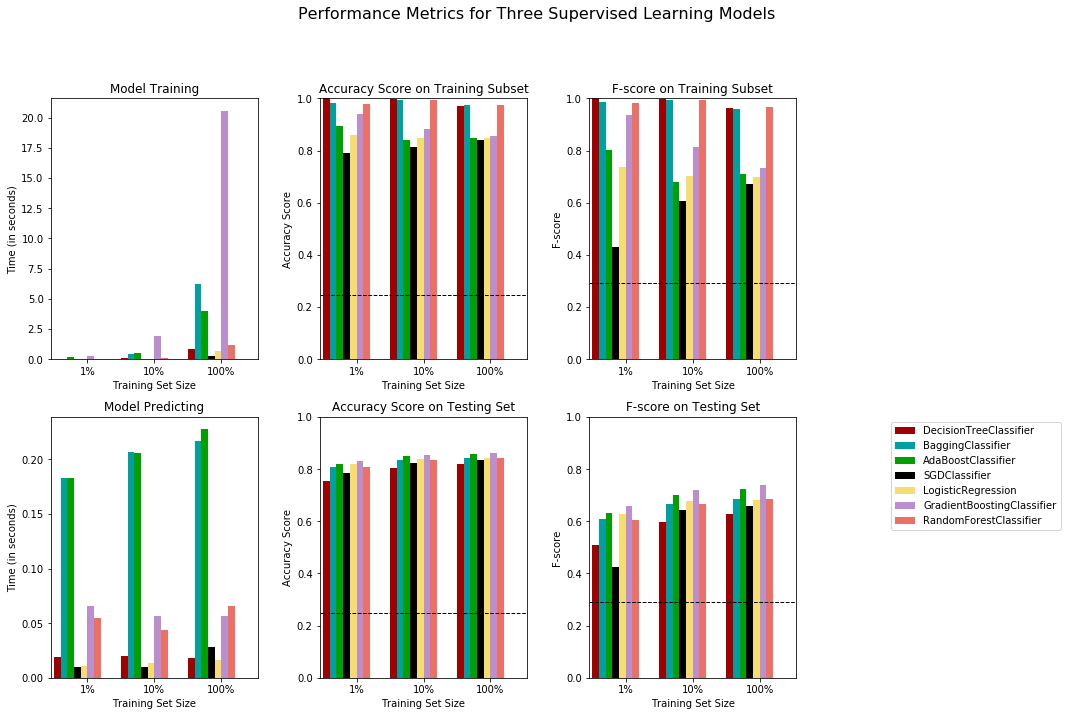

In [171]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state=42)
clf_B = SGDClassifier(random_state=42)
clf_C = LogisticRegression(random_state=42)
clf_D = RandomForestClassifier(random_state=42)
clf_E = GradientBoostingClassifier(random_state=42)
clf_F = DecisionTreeClassifier(random_state=42)
clf_G = BaggingClassifier(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1 * len(y_train))
samples_1 = int(0.01 * len(y_train))

# Collect results on the learners
results = {}
max_results = {}
min_results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
    save_max_results(clf_name, results[clf_name][2], max_results, 'max')
    save_max_results(clf_name, results[clf_name][2], min_results, 'min')

print()
print('Max Results: ')
display_max_results(max_results)
print()
print('Min Results: ')
display_max_results(min_results)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer:**

- The following models have been eliminated based on the results obtained above:
    - **Gaussian Naive Bayes**, due to its low accuracy (59%) and f-score(0.42) on the training and test sets, indicating that it is underfitting the data
    - **K-Nearest-Neighbours**, since even though it generalized well to the test data compared to more powerful algorithms (accuracy = 82%, f-score = 0.64), it's prediction time of 30 seconds was extremely high.
    - **Support Vector Machine**, since the training and prediction times of 120 seconds and 20 seconds respectively are extremely high. even though the model does seem to be generalizing well to the test data
    - **Decision Tree Classifier**, since it is overfitting the training data (with an accuracy of 97% and F-score of 0.96) but underfits the test data (with an accuracy of only 82% and F-score of 0.63)
    - **Bagging Classifier**, since it is overfitting the training data (with an accuracy of 97% and F-score of 0.96) but underfits the test data (with an accuracy of only 84% and F-score of 0.68)
    - **Random Forest Classifier**, since it is overfitting the training data (with an accuracy of 97% and F-score of -0.97) but underfits the test data (with an accuracy of only 84% and F-score of 0.68)
    - **Gradient Boosting Classifier**, since its training time of 12.7 seconds is very high, even though it is fitting the training and test data with relatively equal accuracy equal accuracies and F-scores of 86% and 0.73 respectively.
    - **Stochastic Gradient Descent Classifier**, since it has a comparatively lower F-score of 0.66, even though it is fitting the training and test data with relatively equal accuracies of 83%.
- The following 2 models have emerged as possible candidates:
    - **AdaBoost Classifier**, since it is fitting the training and test data with relatively equal accuracies and F-scores of 86% and 0.72 respectively.
    - **Logistic Regression**, since it is fitting the training and test data with relatively equal accuracies and F-scores of 84% and 0.68 respectively.
- In terms of accuracy and F-scores, **AdaBoost** is the best classifier so far.
- However, in terms of training time and prediction time, **Logistic Regression** comes out as the clear winner with a training time of 0.53 seconds and a prediction time of 0.0099 seconds, compared to a training time of 2.95 seconds and prediction time of 0.13 seconds for **AdaBoost**
- For the current dataset, a larger training and prediction time shouldn't matter too much since we aren't concerned with real-time performance. Since the **AdaBoost classifier has a better accuracy and F-score on the test set, it will be most suitable for the current data.**

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer:** 

- AdaBoost is an ensemble learning technique, which combines a lot of weak learners to make classifications. The weak learners are almost always stumps, which means that each stump only has one feature based on which the training set is split into two leaf nodes. The ideal feature to split on is selected using criteria such as the gini index, entropy, etc.
- During the training phase, AdaBoost trains a bunch of stumps, one at a time in sequence. Each stump is made by taking the previous stump's errors into account. The algorithm penalizes stumps that have a larger misclassification error. It also ensures that subsequent stumps try to classify misclassified training samples more often than correctly classified training samples by giving more weightage to misclassified training samples.
- Unlike a random forest where each decision tree contributes equally to the final voting process / classification, each stump in the AdaBoost algorithm contributes to the final voting process/classification in accordance with its misclassification error. Stumps that classify with high accuracy get more weightage and stumps that classify with lower accuracy get less weightage. This is called the amount of say a stump has in the decision process.
- The training process continues until the accuracy doesn't increase by a substantial amount or a given number of stumps is reached.
- During the prediction phase, the test features are processed by all the stumps and the weighted average of all their outputs yields the final classification.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [168]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {
    'n_estimators' : [10, 50, 100],
    'learning_rate' : [1.0, 0.1]
}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print("Best Estimator = ", best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Best Estimator =  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=42)
Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8606
Final F-score on the testing data: 0.7316


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.8576            | 0.8606          |
| F-score        | 0.7246            | 0.7316          |


**Answer:**

- The scores of the Optimized model are better than the unoptimized model.
- The scores of the optimized and unoptimized models are way better than those of the naive predictor, which had an Accuracy score of 0.2478 and F-score of 0.2917. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

1. Occupation
2. Education
3. Age
4. Workclass
5. Sex

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

[0.16 0.04 0.08 0.2  0.06 0.02 0.   0.   0.   0.02 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.02 0.02 0.   0.   0.
 0.   0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.02 0.02 0.02 0.02
 0.02 0.   0.02 0.02 0.02 0.02 0.   0.   0.02 0.   0.02 0.   0.02 0.
 0.   0.   0.   0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


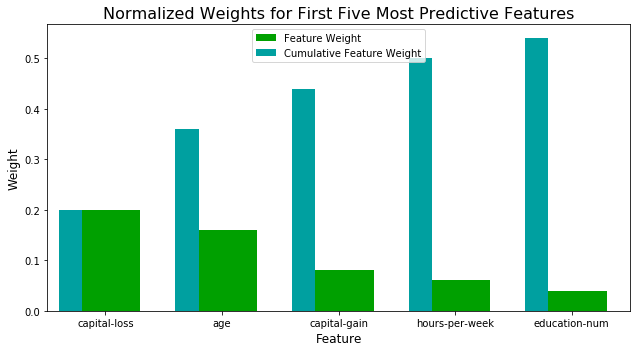

In [150]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(importances)

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

- Only 1 feature matched in both cases, i.e., Age
- I assumed occupation would be a very important feature, since the type of work being done would determine the salary given to that person, irrespective of the number of hours per week worked
- I assumed there could be gender-bias and workclass bias in the workplace which could affect the salary of an individual.
- I assumed the level of education of an individual would be a better indicator than the actual number of years spent in education. 
- In hindsight, capital-gain and capital-loss seem like better predictors since the difference between them would contribute immensely to the total income of an individual. It can be seen in the graphs below that those with higher income (> 50K) tend to have more capital gain and lesser capital loss than those with lower income (<= 50K)

Text(0, 0.5, 'income')

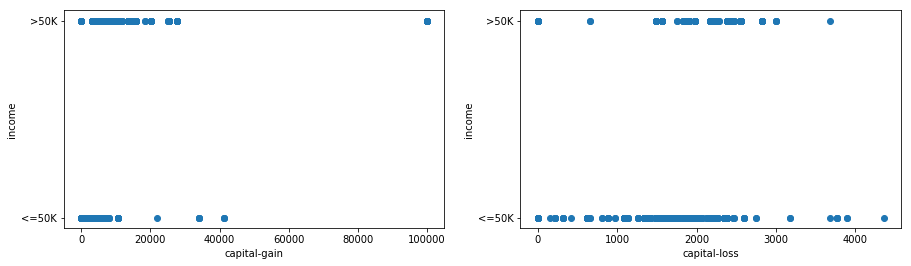

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].scatter(data['capital-gain'], data['income'])
ax[0].set_xlabel('capital-gain')
ax[0].set_ylabel('income')
ax[1].scatter(data['capital-loss'], data['income'])
ax[1].set_xlabel('capital-loss')
ax[1].set_ylabel('income')

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [165]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
start_time = time()
clf = (clone(best_clf)).fit(X_train, y_train)
print("Time for final Model to be trained on full data", (time() - start_time))

# Make new predictions
start_time = time()
reduced_predictions = clf.predict(X_test)
print("Time for final model trained on full data to predict", (time() - start_time))

# Train on the "best" model found from grid search earlier
start_time = time()
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
print("Time for final Model to be trained on reduced data", (time() - start_time))

# Make new predictions
start_time = time()
reduced_predictions = clf.predict(X_test_reduced)
print("Time for final model trained on reduced data to predict", (time() - start_time))

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Time for final Model to be trained on full data 4.338350772857666
Time for final model trained on full data to predict 0.23836278915405273
Time for final Model to be trained on reduced data 1.2905499935150146
Time for final model trained on reduced data to predict 0.1266615390777588
Final Model trained on full data
------
Accuracy on testing data: 0.8606
F-score on testing data: 0.7316

Final Model trained on reduced data
------
Accuracy on testing data: 0.8325
F-score on testing data: 0.6752


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

|     Metric     | Model with all features | Model with reduced features |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.8606            | 0.8325          |
| F-score        | 0.7316            | 0.6752          |
| Training Time  | 4.338             | 1.345           |
| Prediction Time| 0.238             | 0.115           |

- The final model with reduced data performs slightly worse than the model with all features 
- The training time has improved by 68.99% and the prediction time has improved by 51.68%. If training time was a factor, I would definitely consider using the reduced data as my training set

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.